In [54]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn import linear_model
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import warnings
warnings.filterwarnings("ignore")

# Import Data

In [55]:
df_reviews = pd.read_csv("reviews.csv", engine = "python", error_bad_lines=False)
df_listings = pd.read_csv("listings.csv", engine = "python", error_bad_lines=False)
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
...,...,...,...,...,...,...
848720,51909801,439754058671859318,2021-08-29,210113336,Ari,This was one of the Best hotel experiences I h...
848721,51910059,439796226033211137,2021-08-29,175633805,Leo,The room was exactly as described and was over...
848722,51921047,439769182951927960,2021-08-29,255614539,Niki,Fast response <br/>Easy check in <br/><br/>Dep...
848723,51926089,441249378414275416,2021-08-31,419619884,Ingrid,Amazing location and place! You will love it !


# Data Preprocessing & EDA

In [56]:
pd.set_option('display.max_column',None)
# def change_to_list(x):
#     y = []
#     y.append(x)
#     x = y
#     return x

# df_reviews['comments'] = df_reviews['comments'].apply(change_to_list)
# print(df_reviews.head)
df_reviews = df_reviews.groupby('listing_id',as_index=False).agg({'comments': 'sum'}) # add all comment to a list groupby listing_id
# print(df_reviews.head)
df_reviews = df_reviews.rename(columns={"listing_id": "id"})

# get combine df
df = pd.merge(df_reviews, df_listings, on="id",how = 'inner')
df.info()

pd.set_option('display.max_column',None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27627 entries, 0 to 27626
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            27627 non-null  int64  
 1   comments                                      27627 non-null  object 
 2   listing_url                                   27627 non-null  object 
 3   scrape_id                                     27627 non-null  int64  
 4   last_scraped                                  27627 non-null  object 
 5   name                                          27621 non-null  object 
 6   description                                   27026 non-null  object 
 7   neighborhood_overview                         18243 non-null  object 
 8   picture_url                                   27627 non-null  object 
 9   host_id                                       27627 non-null 

In [1]:
api_key = '../api.txt'

In [2]:
%matplotlib inline
import gmplot
gmap = gmplot.GoogleMapPlotter(40.7128, -74.0059, 10)

gmap.apikey=api_key



In [29]:
gmap.heatmap(df['latitude'], df['longitude'])
gmap.draw('Airbnb_NYC.html')
from IPython.display import IFrame
IFrame("Airbnb_NYC.html", width=990, height=500)

4


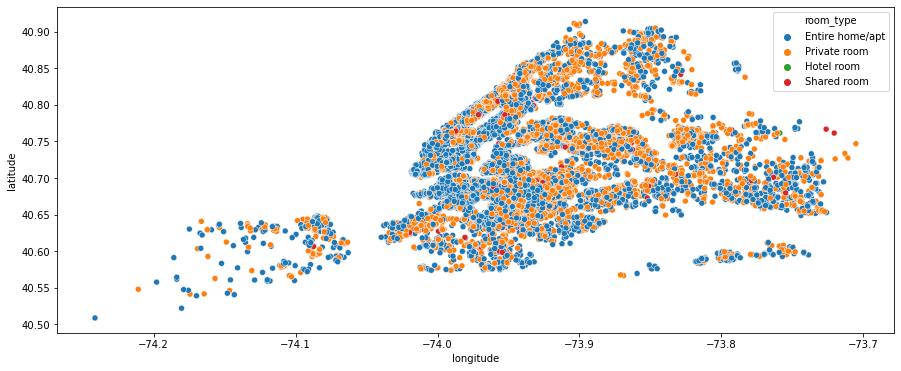

In [57]:
print(df.room_type.nunique())
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type);

## Text Mining

In [58]:
df.comments = df.comments.apply(str)
com = list(df['comments'])
com = ' '.join(com)

In [10]:
comm4 = list(df[df['review_scores_rating']<4]['comments'])
comm4 = ' '.join(comm4)

In [11]:
comm5 = list(df[df['review_scores_rating']==5]['comments'])
comm5 = ' '.join(comm5)

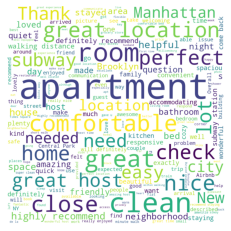

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
STOPWORDS |= {'br','stay','everything','place','York','NYC'}
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1000,height=1000).generate(com)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

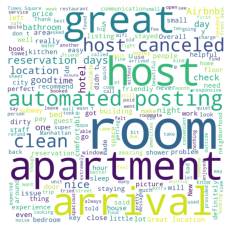

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
STOPWORDS |= {'br','stay','everything','place','York','NYC'}
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1000,height=1000).generate(comm4)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()


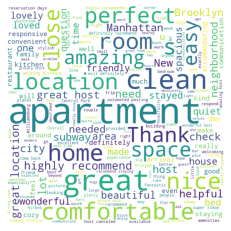

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
STOPWORDS |= {'br','stay','everything','place','York','NYC'}
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1000,height=1000).generate(comm5)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [60]:
df_reviews

,id,comments
0,2595,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,3831,"lisa is a wonderful, kind and thoughtful host...."
2,5121,"Simple place, super nice guy.Great guy with a ..."
3,5136,My family had a wonderful stay at Rebecca and ...
4,5178,"MR. Kasai was a grreat host , very helpful and..."
...,...,...
27622,51909801,This was one of the Best hotel experiences I h...
27623,51910059,The room was exactly as described and was over...
27624,51921047,Fast response <br/>Easy check in <br/><br/>Dep...
27625,51926089,Amazing location and place! You will love it !


In [62]:
df_text = pd.merge(df_reviews, df_listings, on="id",how = 'inner')

In [63]:
df_text

,id,comments,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,Notre séjour de trois nuits.\r<br/>Nous avons ...,https://www.airbnb.com/rooms/2595,20210901220703,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,5,35,65,340,2021-09-02,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,"lisa is a wonderful, kind and thoughtful host....",https://www.airbnb.com/rooms/3831,20210901220703,2021-09-02,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,86%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.684940,-73.957650,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,4,9,208,2021-09-02,408,58,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,"Simple place, super nice guy.Great guy with a ...",https://www.airbnb.com/rooms/5121,20210901220703,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Privat

In [12]:
# len(df_text['name'].unique())

In [13]:
df_text = df_text[['id','review_scores_rating','comments']]

In [14]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27627 entries, 0 to 27626
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27627 non-null  int64  
 1   review_scores_rating  27627 non-null  float64
 2   comments              27627 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 863.3+ KB


In [15]:
df_text_less_4 = df_text[df_text["review_scores_rating"] < 4]
df_text_less_4

,id,review_scores_rating,comments
75,36442,3.50,"The good - Great location, walking distance to..."
230,126816,3.67,"Great location, friendly doormen, en-suite bat..."
366,249618,3.75,"Karina is a gracious host, and was very helpfu..."
403,263232,0.00,The host canceled this reservation 44 days bef...
435,278145,3.67,I really enjoyed staying at Heidi's place. I d...
...,...,...,...
27579,51714409,3.00,"Great host, he was kind. <br/>The bathrooms we..."
27595,51767407,2.00,"Great spot , he’s very friendly and get with c..."
27598,51777023,3.67,"great host great location, clean and quiet ver..."
27616,51860942,1.00,Has not responded to any messages


In [16]:
df_text_less_4_sample, _ = train_test_split(df_text_less_4, test_size=0.9)

In [17]:
df_text_4_5 = df_text[(df_text["review_scores_rating"] < 4.5) & 
                      (df_text["review_scores_rating"] >= 4)]
df_text_4_5

,id,review_scores_rating,comments
1,3831,4.46,"lisa is a wonderful, kind and thoughtful host...."
4,5178,4.21,"MR. Kasai was a grreat host , very helpful and..."
18,12192,4.38,This place was awesome! The location was great...
21,12940,4.48,Very tidy and comfortable! Enjoyed the essence...
22,13121,4.18,Jullet was a wonderful host. Extremely welcomi...
...,...,...,...
27569,51688136,4.33,very very clean place! it was a beautiful plac...
27576,51703788,4.00,"Excellent location, two blocks from the beach...."
27613,51840559,4.00,It was a very semi-private stay with a lot of ...
27617,51862486,4.00,Had a great stay!


In [18]:
df_text_4_5_sample, _ = train_test_split(df_text_4_5, test_size=0.9)

In [19]:
df_text_4_7 = df_text[(df_text["review_scores_rating"] < 4.7) & 
                      (df_text["review_scores_rating"] >= 4.5)]
df_text_4_7

,id,review_scores_rating,comments
2,5121,4.52,"Simple place, super nice guy.Great guy with a ..."
7,6848,4.56,Stayed with Allen and Irina about a year ago. ...
13,9357,4.52,"Funky studio, helpful host, great location nea..."
16,10452,4.67,i really liked it here. the carpet/flooring of...
24,13808,4.67,"Beautiful home, beautiful people.JT and Tizian..."
...,...,...,...
27513,51578658,4.67,"Great space!Enjoyed my time here, unique listi..."
27520,51595857,4.50,"la atención de Jay es increíble, te recibe y t..."
27525,51599270,4.67,Such a beautiful room with plenty of sunlight ...
27590,51744957,4.67,Communication great and very nice and politeVe...


In [20]:
df_text_4_7_sample, _ = train_test_split(df_text_4_7, test_size=0.9)

In [21]:
df_text_4_8 = df_text[(df_text["review_scores_rating"] < 4.8) & 
                      (df_text["review_scores_rating"] >= 4.7)]
df_text_4_8

,id,review_scores_rating,comments
0,2595,4.70,Notre séjour de trois nuits.\r<br/>Nous avons ...
6,5803,4.70,"Artwork, indeed! The walls are covered with dr..."
12,8490,4.77,Nathalie's brownstone truly is eden in the hoo...
14,9657,4.70,We had a really good time in NYC from the firs...
17,10962,4.74,We stayed at Laurie's place for one night in s...
...,...,...,...
27393,51349209,4.75,"Uriel was a wonderful host, he was helpful and..."
27402,51382527,4.75,Great propertyPerfect 1 bed room for 2/3 peopl...
27464,51504610,4.75,Great stay. Bed was super comfortable and just...
27466,51508076,4.75,es un lugar muy lindo y acogedor en una zona p...


In [22]:
df_text_4_8_sample, _ = train_test_split(df_text_4_8, test_size=0.9)

In [23]:
df_text_4_9 = df_text[(df_text["review_scores_rating"] < 4.9) & 
                      (df_text["review_scores_rating"] >= 4.8)]
df_text_4_9

,id,review_scores_rating,comments
8,6990,4.88,"Cynthia is very warm and welcoming, she does a..."
9,7064,4.86,What a great spot. The apartment is spacious a...
10,7097,4.87,A great space for a fair price in one of Brook...
11,7801,4.86,We stayed at Chaya's place for a week with our...
15,9704,4.89,I had such a great time and pleasure staying w...
...,...,...,...
27431,51439322,4.89,Loved my stay here!Rumena’s newly renovated pl...
27440,51454273,4.89,Joseph is a great host! Friendly and nice. G...
27460,51499702,4.80,ExelenteWe had an amazing time in New York. Du...
27490,51555159,4.83,"Disfrutamos mucho del departamento de Karl, mu..."


In [24]:
df_text_4_9_sample, _ = train_test_split(df_text_4_9, test_size=0.9)

In [26]:
df_text_5_0 = df_text[(df_text["review_scores_rating"] < 5.0) & 
                      (df_text["review_scores_rating"] >= 4.9)]
df_text_5_0

,id,review_scores_rating,comments
5,5203,4.91,Emmie and her family are exceptional hosts. Th...
20,12937,4.90,I had an excellent time at Orestes' place in N...
32,16326,4.93,"Dimitri, is an excellent host, very helpful an..."
38,17693,4.90,"Such amazing hosts, at such a beautiful place...."
39,17747,4.93,George and Lily are a terrific host and hostes...
...,...,...,...
27055,50873779,4.92,I don’t even know where to start. I called Tia...
27096,50913633,4.90,We were guests for the opening night and subse...
27100,50914043,4.94,"Very clean space, accommodating for 3-4 people..."
27161,50997233,4.92,Staying at the Freeman House was wonderful! Fr...


In [27]:
df_text_5_0_sample, _ = train_test_split(df_text_5_0, test_size=0.9)

In [28]:
df_text_high = df_text[df_text["review_scores_rating"] == 5.0]
df_text_high

,id,review_scores_rating,comments
3,5136,5.0,My family had a wonderful stay at Rebecca and ...
30,15396,5.0,Chelsea's apartment was the perfect fit for ou...
42,18961,5.0,Fabian was a great host. He was flexible on my...
50,21644,5.0,"Comfortable bed, decent shower ane a very quie..."
71,32329,5.0,"Victor's fantastic. Attentive, available, frie..."
...,...,...,...
27621,51908517,5.0,"Excellent place. I really liked the location,..."
27622,51909801,5.0,This was one of the Best hotel experiences I h...
27623,51910059,5.0,The room was exactly as described and was over...
27624,51921047,5.0,Fast response <br/>Easy check in <br/><br/>Dep...


In [29]:
df_text_high_sample, _ = train_test_split(df_text_high, test_size=0.9)

In [31]:
text_less_4 = df_text_less_4_sample['comments'].astype(str).tolist()
text_less_4 = ' '.join(text_less_4)
#text_less_4

In [32]:
text_less_4_list_tuple = [('Rating less than 4',text_less_4)]


In [33]:
text_4_5 = df_text_4_5_sample['comments'].astype(str).tolist()
text_4_5= ' '.join(text_4_5)
text_4_5_list_tuple = [('4 <= Rating < 4.5',text_4_5)]

In [34]:
text_high = df_text_high_sample['comments'].astype(str).tolist()
text_high = ' '.join(text_high)
text_high_list_tuple = [('Rating = 5',text_high)]

In [35]:
text_4_7 = df_text_4_7_sample['comments'].astype(str).tolist()
text_4_7 = ' '.join(text_4_7)
text_4_7_list_tuple = [('4.5 <= Rating < 4.7',text_4_7)]

In [37]:
text_4_8 = df_text_4_8_sample['comments'].astype(str).tolist()
text_4_8 = ' '.join(text_4_8)
text_4_8_list_tuple = [('4.7 <= Rating < 4.8',text_4_8)]

In [38]:
text_4_9 = df_text_4_9_sample['comments'].astype(str).tolist()
text_4_9 = ' '.join(text_4_9)
text_4_9_list_tuple = [('4.8 <= Rating < 4.9',text_4_9)]

In [39]:
text_5_0 = df_text_5_0_sample['comments'].astype(str).tolist()
text_5_0 = ' '.join(text_5_0)
text_5_0_list_tuple = [('4.9 <= Rating < 5.0',text_5_0)]

In [40]:
list_tuple = []
list_tuple.extend(text_less_4_list_tuple)
list_tuple.extend(text_4_5_list_tuple)
list_tuple.extend(text_4_7_list_tuple)
list_tuple.extend(text_4_8_list_tuple)
list_tuple.extend(text_4_9_list_tuple)
list_tuple.extend(text_5_0_list_tuple)


In [41]:
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [42]:
emotion_dict = get_nrc_data()


In [43]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [44]:
def comparative_emotion_analyzer(text_tuples,object_name="hosts",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[0][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it        
analyzer_less_than_4 = comparative_emotion_analyzer(text_less_4_list_tuple)
analyzer_less_than_4

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
hosts,,,,,,,,,
Rating less than 4,0.006998,0.019814,0.018959,0.031124,0.014118,0.006632,0.014443,0.008951,0.006794


In [45]:
analyzer_equal_5 = comparative_emotion_analyzer(text_high_list_tuple)
analyzer_equal_5

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
hosts,,,,,,,,,
Rating = 5,0.001652,0.030446,0.005137,0.048662,0.025696,0.00084,0.019515,0.004761,0.008484


In [46]:
analyzer = comparative_emotion_analyzer(list_tuple)

In [49]:
analyzer

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
hosts,,,,,,,,,
Rating less than 4,0.006998,0.019814,0.018959,0.031124,0.014118,0.006632,0.014443,0.008951,0.006794
4 <= Rating < 4.5,0.003719,0.025499,0.010855,0.038843,0.019334,0.002791,0.017668,0.006220,0.007914
4.5 <= Rating < 4.7,0.003120,0.026042,0.008774,0.039559,0.020717,0.001913,0.017922,0.005603,0.007693
4.7 <= Rating < 4.8,0.002785,0.027050,0.007243,0.042168,0.021884,0.001232,0.017922,0.005424,0.007784
4.8 <= Rating < 4.9,0.002571,0.028765,0.006466,0.044776,0.023614,0.001125,0.019199,0.005582,0.008591
4.9 <= Rating < 5.0,0.002571,0.028765,0.006466,0.044776,0.023614,0.001125,0.019199,0.005582,0.008591


In [69]:
result = pd.concat([analyzer,analyzer_equal_5])

In [71]:
result = result.T

<AxesSubplot:>

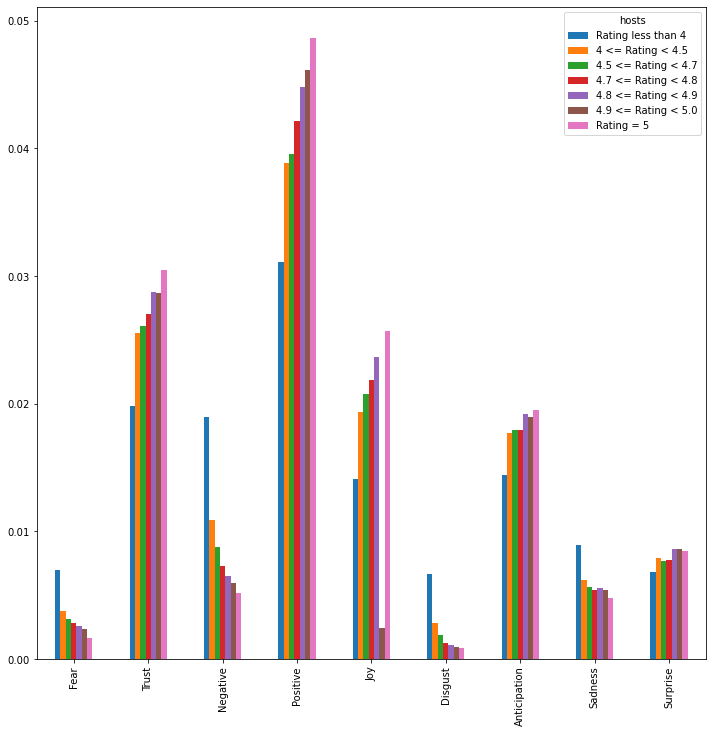

In [76]:
result.plot.bar(figsize = (12,12))
